In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D


In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}


In [3]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)


SVC(kernel='linear')

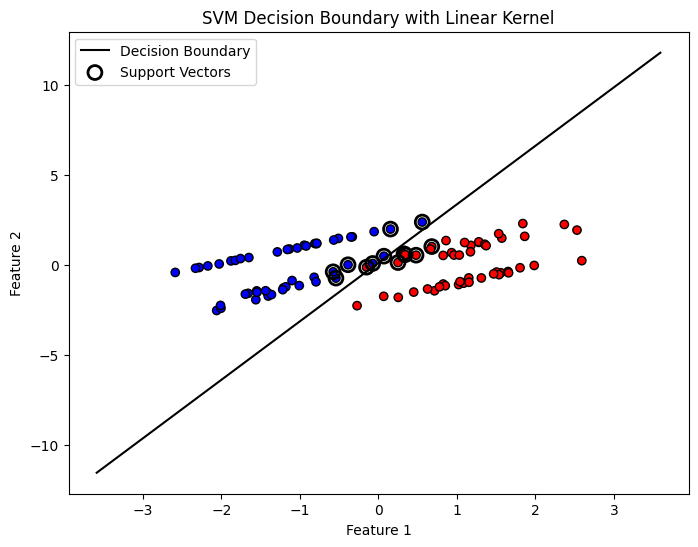

In [4]:
def plot_svm_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')

    # Get the hyperplane parameters
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # Compute decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx = np.linspace(x_min, x_max, 100)
    yy = (-w[0] * xx - b) / w[1]
    
    plt.plot(xx, yy, 'k-', label="Decision Boundary")
    
    # Support Vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=100, facecolors='none', edgecolors='k', linewidths=2, label="Support Vectors")
    
    plt.legend()
    plt.title("SVM Decision Boundary with Linear Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_svm_decision_boundary(svm_model, X, y)


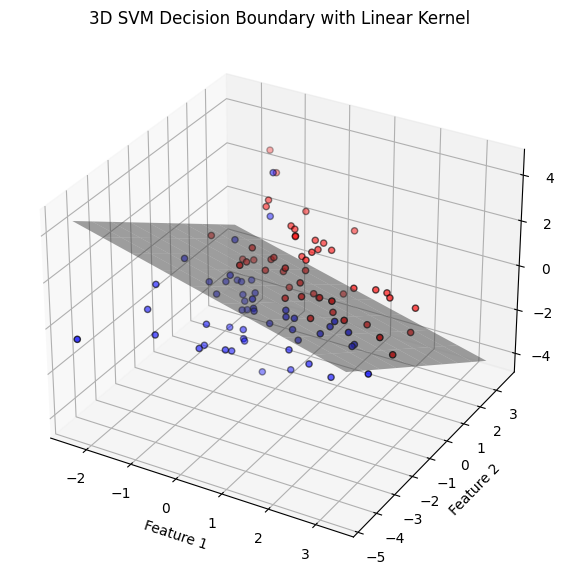

In [5]:
X_3D, y_3D = make_classification(n_samples=100, n_features=3, n_classes=2, n_informative=3, n_redundant=0, random_state=42)
y_3D = np.where(y_3D == 0, -1, 1)

svm_model_3D = SVC(kernel='linear', C=1.0)
svm_model_3D.fit(X_3D, y_3D)

def plot_3D_svm(model, X, y):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of points
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.bwr, edgecolors='k')

    # Get hyperplane
    w = model.coef_[0]
    b = model.intercept_[0]

    # Create mesh grid
    x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
    y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
    xx, yy = np.meshgrid(x_range, y_range)
    zz = (-w[0] * xx - w[1] * yy - b) / w[2]

    ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    ax.set_title("3D SVM Decision Boundary with Linear Kernel")
    plt.show()

plot_3D_svm(svm_model_3D, X_3D, y_3D)
